In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
 # Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5e2c0addb2379ad604f19c90b9428be2


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | sumbawa
City not found. Skipping...
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 1 | dudinka
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | itaituba
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | san juan
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | sinazongwe
Processing Record 15 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 16 of Set 1 | ogulin
Processing Record 17 of Set 1 | arman
Processing Record 18 of Set 1 | cayenne
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 | puerto ayora
Processing Recor

Processing Record 38 of Set 4 | port lincoln
Processing Record 39 of Set 4 | chalchihuites
Processing Record 40 of Set 4 | amderma
City not found. Skipping...
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | huarmey
Processing Record 43 of Set 4 | dikson
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | tual
Processing Record 46 of Set 4 | laguna
Processing Record 47 of Set 4 | sorland
Processing Record 48 of Set 4 | eldikan
City not found. Skipping...
Processing Record 49 of Set 4 | pokosnoye
Processing Record 50 of Set 4 | rabat
Processing Record 1 of Set 5 | eskasem
City not found. Skipping...
Processing Record 2 of Set 5 | port alfred
Processing Record 3 of Set 5 | bargal
City not found. Skipping...
Processing Record 4 of Set 5 | belmonte
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | ust-ishim
Processing Record 7 of Set 5 | nepalganj
City not found. Skipping...
Processing Record 8 of Set 5 | praia da vitoria
Proces

Processing Record 24 of Set 8 | birin
Processing Record 25 of Set 8 | alta floresta
Processing Record 26 of Set 8 | shubarkuduk
Processing Record 27 of Set 8 | sant feliu de guixols
Processing Record 28 of Set 8 | klyuchi
Processing Record 29 of Set 8 | huilong
Processing Record 30 of Set 8 | sobolevo
Processing Record 31 of Set 8 | inirida
Processing Record 32 of Set 8 | ninotsminda
Processing Record 33 of Set 8 | vikhorevka
Processing Record 34 of Set 8 | poum
Processing Record 35 of Set 8 | korgoz
Processing Record 36 of Set 8 | fort frances
Processing Record 37 of Set 8 | nelson bay
Processing Record 38 of Set 8 | bilibino
Processing Record 39 of Set 8 | pulivendla
Processing Record 40 of Set 8 | vardo
Processing Record 41 of Set 8 | nueva esperanza
Processing Record 42 of Set 8 | riyadh
Processing Record 43 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 44 of Set 8 | saint anthony
Processing Record 45 of Set 8 | iqaluit
Processing Record 46 of Set 8 | port-gen

Processing Record 11 of Set 12 | emerald
Processing Record 12 of Set 12 | panambi
Processing Record 13 of Set 12 | sitrah
Processing Record 14 of Set 12 | kawalu
Processing Record 15 of Set 12 | rawson
Processing Record 16 of Set 12 | buraydah
Processing Record 17 of Set 12 | sao felix do xingu
Processing Record 18 of Set 12 | mala
Processing Record 19 of Set 12 | salalah
Processing Record 20 of Set 12 | nhulunbuy
Processing Record 21 of Set 12 | eyl
Processing Record 22 of Set 12 | mendoza
Processing Record 23 of Set 12 | axixa do tocantins
City not found. Skipping...
Processing Record 24 of Set 12 | kushima
Processing Record 25 of Set 12 | panji
Processing Record 26 of Set 12 | celestun
Processing Record 27 of Set 12 | tsiroanomandidy
Processing Record 28 of Set 12 | temaraia
City not found. Skipping...
Processing Record 29 of Set 12 | aripuana
Processing Record 30 of Set 12 | canutama
Processing Record 31 of Set 12 | ciparay
Processing Record 32 of Set 12 | manikpur
Processing Recor

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,60.28,34,0,5.61,ZA,2021-07-23 15:02:40
1,Avarua,-21.2078,-159.7750,73.45,88,75,5.75,CK,2021-07-23 15:02:41
2,Mar Del Plata,-38.0023,-57.5575,62.13,56,14,8.01,AR,2021-07-23 15:02:41
3,Namibe,-15.1961,12.1522,72.82,72,3,10.42,AO,2021-07-23 15:02:42
4,Dudinka,69.4058,86.1778,58.78,46,100,8.75,RU,2021-07-23 15:02:43
5,Bluff,-46.6000,168.3333,47.80,84,100,10.69,NZ,2021-07-23 15:02:43
6,Itaituba,-4.2761,-55.9836,95.54,30,17,6.20,BR,2021-07-23 15:02:36
7,Mataura,-46.1927,168.8643,47.48,89,89,3.06,NZ,2021-07-23 15:02:44
8,San Juan,-31.5375,-68.5364,65.55,17,97,4.00,AR,2021-07-23 14:59:31
9,Jamestown,42.0970,-79.2353,75.18,56,1,8.05,US,2021-07-23 15:02:45


In [11]:
#Reorder the columns
new_column_order = ["City", "Country","Date", "Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-07-23 15:02:40,-33.9258,18.4232,60.28,34,0,5.61
1,Avarua,CK,2021-07-23 15:02:41,-21.2078,-159.7750,73.45,88,75,5.75
2,Mar Del Plata,AR,2021-07-23 15:02:41,-38.0023,-57.5575,62.13,56,14,8.01
3,Namibe,AO,2021-07-23 15:02:42,-15.1961,12.1522,72.82,72,3,10.42
4,Dudinka,RU,2021-07-23 15:02:43,69.4058,86.1778,58.78,46,100,8.75


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting. 6.3.1
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

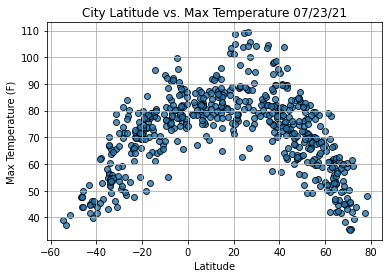

In [16]:
## Create a scatter plot for the latitude vs. maximum temperature and run the cell. 6.3.1
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


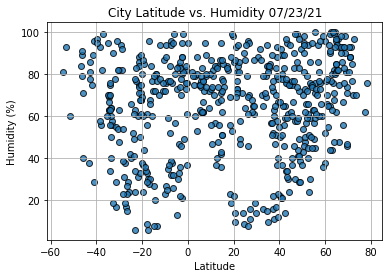

In [17]:
# Build the scatter plots for latitude vs. humidity. 6.3.1
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

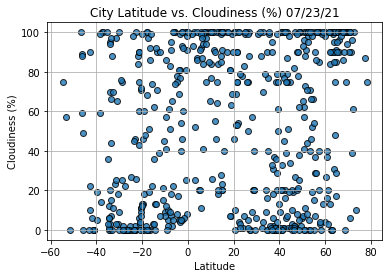

In [18]:
# Build the scatter plots for latitude vs. cloudiness. 6.3.1
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

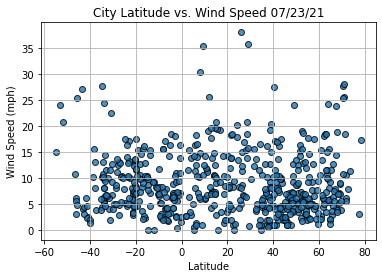

In [19]:
# Build the scatter plots for latitude vs. wind speed. 6.3.1
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()